<a href="https://colab.research.google.com/github/pw3058396/Predict-Fashion-Image-score-by-using-CNN-with-regression-and-classification/blob/main/CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial shows how to classify images of flowers using a `tf.keras.Sequential` model and load data using `tf.keras.utils.image_dataset_from_directory`. It demonstrates the following concepts:


* Efficiently loading a dataset off disk.
* Identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout.

This tutorial follows a basic machine learning workflow:

1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

In addition, the notebook demonstrates how to convert a [saved model](../../../guide/saved_model.ipynb) to a [TensorFlow Lite](https://www.tensorflow.org/lite/) model for on-device machine learning on mobile, embedded, and IoT devices.

## Setup

Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array

## Download and explore the dataset

The dataset contains two classes:

```
children_Toys_photo/
  Safe/
  Unsafe
```

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After downloading, you should now have a copy of the dataset available.

## Load data using a Keras utility

Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [Load and preprocess images](../load_data/images.ipynb) tutorial.

### Create a dataset

Define some parameters for the loader:

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [62]:
import csv
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Specify the path to the CSV file
csv_file_path = '/content/drive/MyDrive/Evaluation method for ranking fashion design based on customer rank/Shien_girl NEW_1-5 class.csv'

label_dict = {}

with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row

    for row in reader:
        if len(row) > 0:
            filename = row[0]  # The filename is in the first column
            label = row[6]  # The label is in the seventh column

            try:
                # Try to convert the label to a float
                label_value = label
                # Remove the file extension from the filename in the CSV file
                label_dict[filename] = label_value
            except ValueError:
                # Print the invalid label value for debugging
                print(f"Invalid label value: {label}")

# Iterate over the image folder and process each image file
image_folder = '/content/drive/MyDrive/Evaluation method for ranking fashion design based on customer rank/Shien_gril generated AI + original'
images = []
labels = []
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):  # Ensure the filename ends with .jpg
        image_path = os.path.join(image_folder, filename)
        # Load the image
        img_height = 224
        img_width = 224
        img = load_img(image_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        # Remove the file extension from the filename
        base_filename = filename[:-4]
        # Get the label from the dictionary using the base filename
        labels.append(label_dict.get(base_filename, -1))  # Use the filename without extension to lookup the label

# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)



In [63]:
print(label_dict)

{'1709106741': '5 ', '1709106753': '5 ', '1709106761': '5 ', '1709106773': '4 ', '1709106785': '5 ', '1709106814': '5 ', '1709106823': '5 ', '1709106833': '5 ', '1709106844': '5 ', '1709106854': '5 ', '1709106865': '5 ', '1709106876': '4 ', '1709106886': '3 ', '1709106897': '5 ', '1709106910': '5 ', '1709106920': '5 ', '1709106931': '5 ', '1709106941': '5 ', '1709106952': '5 ', '1709106960': '4 ', '1709106970': '4 ', '1709106978': '5 ', '1709106987': '5 ', '1709106994': '5 ', '1709107000': '4 ', '1709107007': '5 ', '1709107014': '4 ', '1709107023': '5 ', '1709107034': '5 ', '1709107041': '5 ', '1709107048': '5 ', '1709107055': '5 ', '1709107064': '5 ', '1709107071': '5 ', '1709107081': '5 ', '1709107088': '5 ', '1709107094': '5 ', '1709107101': '4 ', '1709107107': '5 ', '1709107114': '5 ', '1709107119': '5 ', '1709107124': '5 ', '1709107131': '5 ', '1709107138': '3 ', '1709107144': '3 ', '1709107150': '5 ', '1709107157': '5 ', '1709107164': '5 ', '1709107171': '5 ', '1709107178': '5 ',

In [64]:
print(filename)

1709107904.jpg


In [13]:
# 检查前 10 个图像的标签
for i in range(100):
    print(f"picture {i+1} 's label': {labels[i]}")



picture 1 's label': 5 
picture 2 's label': 5 
picture 3 's label': 5 
picture 4 's label': 4 
picture 5 's label': 3 
picture 6 's label': 5 
picture 7 's label': 5 
picture 8 's label': 4 
picture 9 's label': 5 
picture 10 's label': 5 
picture 11 's label': 4 
picture 12 's label': 5 
picture 13 's label': 5 
picture 14 's label': 5 
picture 15 's label': 5 
picture 16 's label': 5 
picture 17 's label': 5 
picture 18 's label': 5 
picture 19 's label': 5 
picture 20 's label': 4 
picture 21 's label': 5 
picture 22 's label': 5 
picture 23 's label': 5 
picture 24 's label': 5 
picture 25 's label': 3 
picture 26 's label': 5 
picture 27 's label': 5 
picture 28 's label': 5 
picture 29 's label': 5 
picture 30 's label': 5 
picture 31 's label': 5 
picture 32 's label': 5 
picture 33 's label': 5 
picture 34 's label': 5 
picture 35 's label': 5 
picture 36 's label': 5 
picture 37 's label': 4 
picture 38 's label': 5 
picture 39 's label': 5 
picture 40 's label': 5 
picture 4

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [15]:
from sklearn.model_selection import train_test_split

# Assume train_images, test_images, train_labels, test_labels are the already loaded datasets and labels
# Use the train_test_split function to split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now train_labels and test_labels contain the labels for the training and testing sets, respectively

# Print the sizes of the training and testing sets
print(f"train_images.shape: {train_images.shape}, train_labels.shape: {train_labels.shape}")
print(f"test_images.shape: {test_images.shape}, test_labels.shape: {test_labels.shape}")


train_images.shape: (686, 224, 224, 3), train_labels.shape: (686,)
test_images.shape: (172, 224, 224, 3), test_labels.shape: (172,)


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [16]:
class_names = ['0', '1', '2', '3', '4', '5']
num_classes = len(class_names)


In [17]:
num_classes = train_labels
print(class_names)

['0', '1', '2', '3', '4', '5']


## Visualize the data

Here are the first nine images from the training dataset:

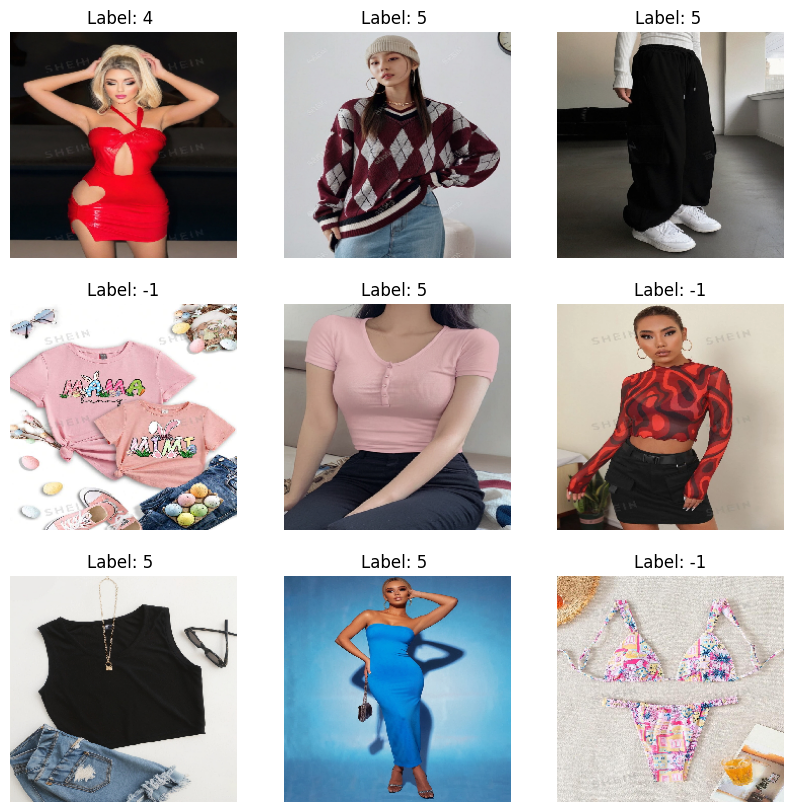

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].astype("uint8"))
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")

plt.show()

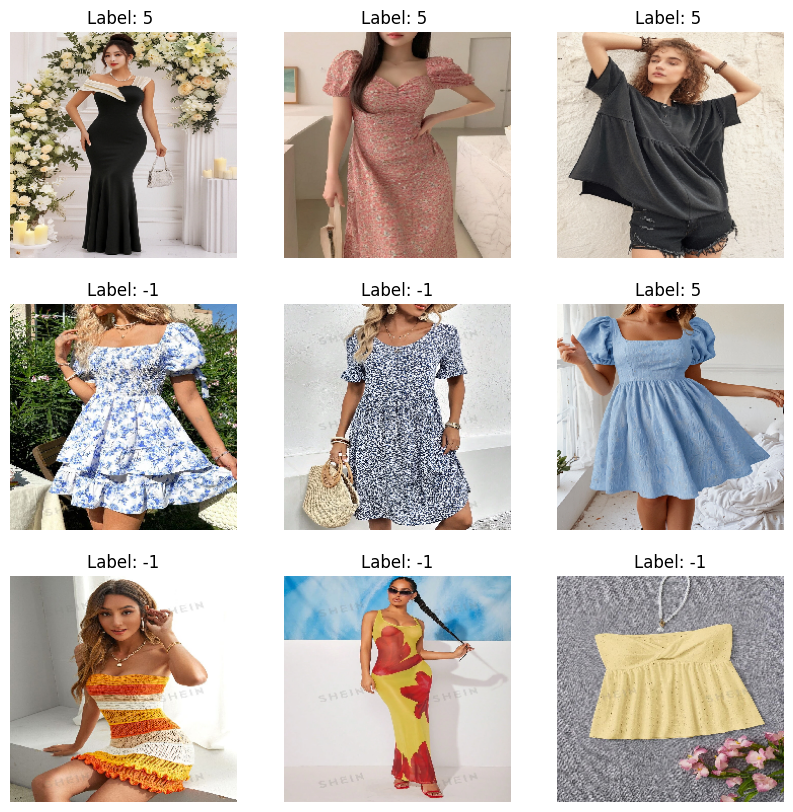

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].astype("uint8"))
    plt.title(f"Label: {test_labels[i]}")
    plt.axis("off")

plt.show()

You will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

The `image_batch` is a tensor of the shape `(32, 200, 200, 3)`. This is a batch of 32 images of shape `200x200x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [65]:
import tensorflow as tf

# 将 numpy 数组转换为 tf.data.Dataset 对象
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

AUTOTUNE = tf.data.AUTOTUNE

# 对训练集进行缓存、混洗和预提取
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# 对测试集进行缓存和预提取
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [66]:
normalization_layer = layers.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [67]:
# Define a normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the training dataset
normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

# Retrieve a batch of normalized images and labels
image_batch, labels_batch = next(iter(normalized_train_dataset))

# Get the first normalized image
first_image = image_batch[0]

# Output the minimum and maximum values of the normalized image
print(np.min(first_image), np.max(first_image))

0.039215688 0.9333334


Or, you can include the layer inside your model definition, which can simplify deployment. Use the second approach here.

Note: You previously resized images using the `image_size` argument of `tf.keras.utils.image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the `tf.keras.layers.Resizing` layer.

## A basic Keras model

### Create the model

The Keras [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

In [68]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

For this tutorial, choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [70]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,014 (24.59 MB)

 Trainable params: 6,447,014 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

Train the model for 10 epochs with the Keras `Model.fit` method:

In [71]:
print(train_labels.dtype)
print(test_labels.dtype)

float64
float64


In [72]:
train_labels = train_labels.astype('float')
test_labels = test_labels.astype('float')

In [73]:
epochs = 10
history = model.fit(
    train_images, train_labels,
    batch_size=32, validation_split=0.2,
    epochs=epochs
)




Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.3877 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4597 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4737 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4673 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4447 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4832 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4398 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4840 - loss: nan - val_accuracy: 0.4855 - val_loss: nan
Epoch 9/10
18/18 ━━━━━━━━━━━━━━

## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

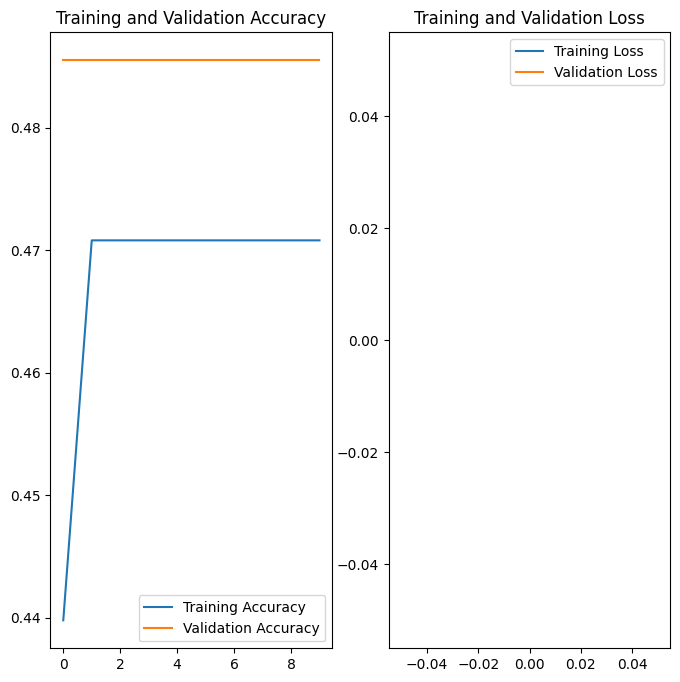

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.

The following tutorial sections show how to inspect what went wrong and try to increase the overall performance of the model.

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *dropout* to your model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside your model like other layers, and run on the GPU.

In [75]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight  # 导入 compute_class_weight

# 示例数据加载函数
def load_data():
    images = np.random.rand(100, img_height, img_width, 3)
    labels = np.random.randint(0, 5, size=(100,))
    return images, labels

# 加载数据
img_height = 224
img_width = 224
images, labels = load_data()

# 归一化图像数据
images = images / 255.0

# 计算类别权重以处理数据不平衡
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# 分离不同分类的数据
class_indices = [np.where(labels == i)[0] for i in range(6)]  # 分类数量为6
images_classes = [images[idx] for idx in class_indices]

# 定义数据增强
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# 仅应用数据增强到标签为1到4的数据
augmented_images_classes = [data_augmentation(imgs, training=True) if i < 5 else imgs for i, imgs in enumerate(images_classes)]

# 将增强后的数据和未增强的数据合并
augmented_images = np.concatenate(augmented_images_classes, axis=0)
augmented_labels = np.concatenate([labels[idx] for idx in class_indices], axis=0)

# 混淆数据
shuffle_indices = np.random.permutation(len(augmented_labels))
augmented_images = augmented_images[shuffle_indices]
augmented_labels = augmented_labels[shuffle_indices]



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Visualize a few augmented examples by applying data augmentation to the same image several times:

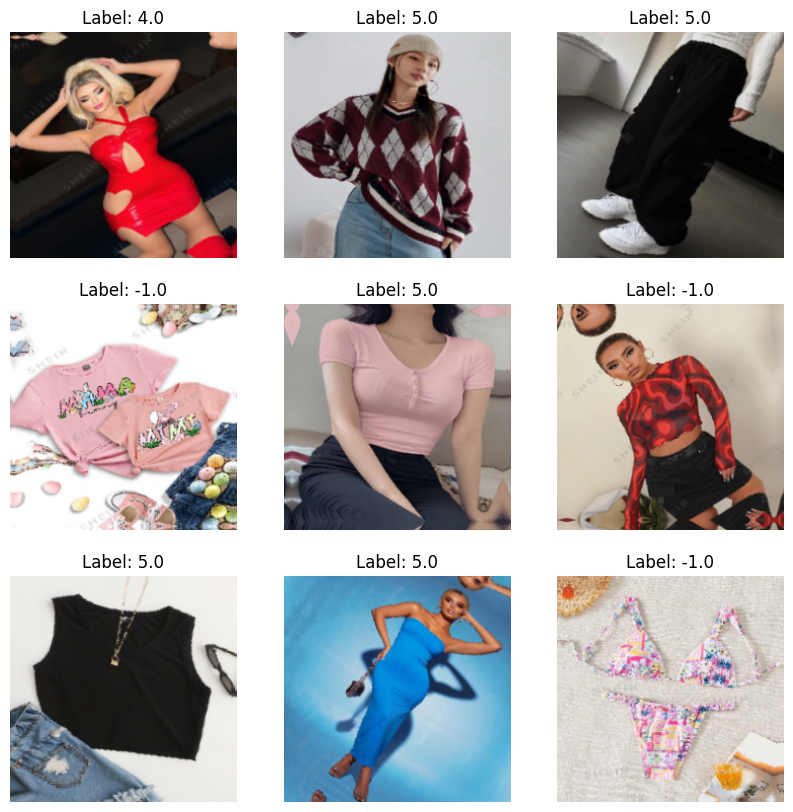

In [77]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(train_images[i:i+1])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.show()


You will add data augmentation to your model before training in the next step.

## Dropout

Another technique to reduce overfitting is to introduce [dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with `tf.keras.layers.Dropout` before training it using the augmented images:

In [78]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  ##layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,014 (24.59 MB)

 Trainable params: 6,447,014 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
epochs = 10
history = model.fit(
  test_images, test_labels,
  batch_size=32, validation_split=0.2,
  epochs=epochs
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.0181 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0399 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0225 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0294 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0212 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0190 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0216 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0142 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/10
5/5 

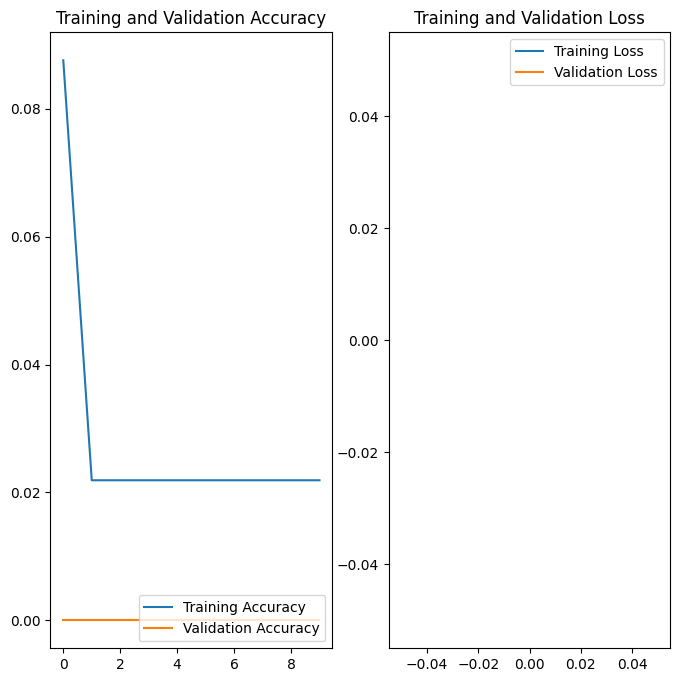

In [38]:
# Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

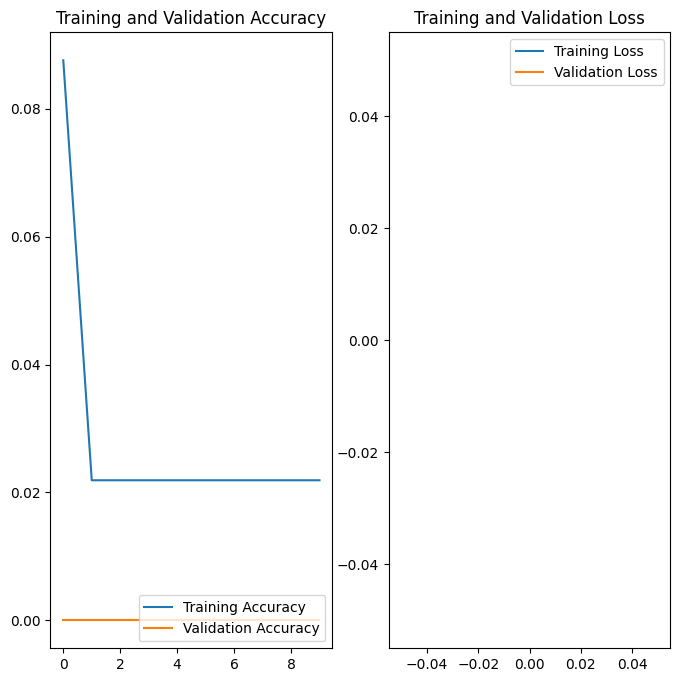

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
# epochs = 20
# history = model.fit(
#   train_path,
#   validation_data=val_path,
#   epochs=epochs
# )

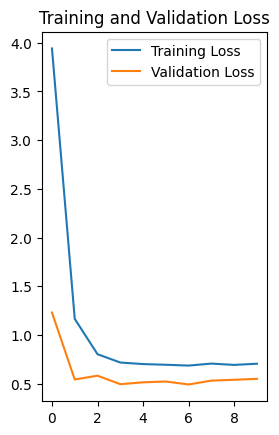

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

In [48]:
model.save('my_model.keras')

In [40]:
from keras.models import load_model

# Load the model
model = load_model('my_model.keras')

In [41]:
# Convert class_names to a list of strings
class_names_str = [str(class_name) for class_name in class_names]

# Create a mapping of class names to indices
class_indices = {class_name: i for i, class_name in enumerate(class_names_str)}

# Print the mapping
print(class_indices)






{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [43]:
# Assuming you have test_images and test_labels obtained from train_test_split

# Make predictions on the test dataset
predictions = model.predict(test_images)

# You can then evaluate the predictions using test_labels or any other evaluation metric


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [44]:
total_confidence = 0
total_predictions = len(predictions)

# Process predictions
for i, prediction in enumerate(predictions):
    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Get the actual label for the current prediction
    actual_label = test_labels[i]  # Assuming test_labels is available and corresponds to test_images

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name, confidence score, and actual label for each prediction
    print(f"Prediction {i+1}: Predicted Class: {predicted_class_name}, Confidence: {confidence_score}, Actual Label: {actual_label}")

# Calculate the average confidence score
average_confidence = total_confidence / total_predictions
print("Average Confidence Score:", average_confidence)


Prediction 1: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 2: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 3: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 4: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 5: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 6: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 7: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 8: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 9: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 10: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 11: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 12: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 13: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 14: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 15: Predic

In [81]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 假设 predictions 是模型的预测结果，class_names 是类别名称，test_labels 是实际标签

# 假设 predictions 是模型输出的原始分数 (logits)，而不是 softmax 后的概率
# class_names 是类别名称的列表
# test_labels 是实际标签的索引列表，与 test_images 对应

total_confidence = 0
total_predictions = len(predictions)

# 存储所有预测的类别索引和实际标签
predicted_class_indices = []

# Process predictions
for i, prediction in enumerate(predictions):
    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)
    predicted_class_indices.append(predicted_class_index)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Get the actual label for the current prediction
    actual_label = test_labels[i]  # Assuming test_labels is available and corresponds to test_images

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name, confidence score, and actual label for each prediction
    print(f"Prediction {i+1}: Predicted Class: {predicted_class_name}, Confidence: {confidence_score}, Actual Label: {actual_label}")

# Calculate the average confidence score
average_confidence = total_confidence / total_predictions
print("Average Confidence Score:", average_confidence)

# Calculate and print evaluation metrics
accuracy = accuracy_score(test_labels, predicted_class_indices)
precision = precision_score(test_labels, predicted_class_indices, average='weighted')
recall = recall_score(test_labels, predicted_class_indices, average='weighted')
f1 = f1_score(test_labels, predicted_class_indices, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_class_indices)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')


Prediction 1: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 2: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 3: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 4: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 5: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 6: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 7: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 8: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 9: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 10: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 11: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 12: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 13: Predicted Class: 0, Confidence: nan, Actual Label: 5.0
Prediction 14: Predicted Class: 0, Confidence: nan, Actual Label: -1.0
Prediction 15: Predic

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


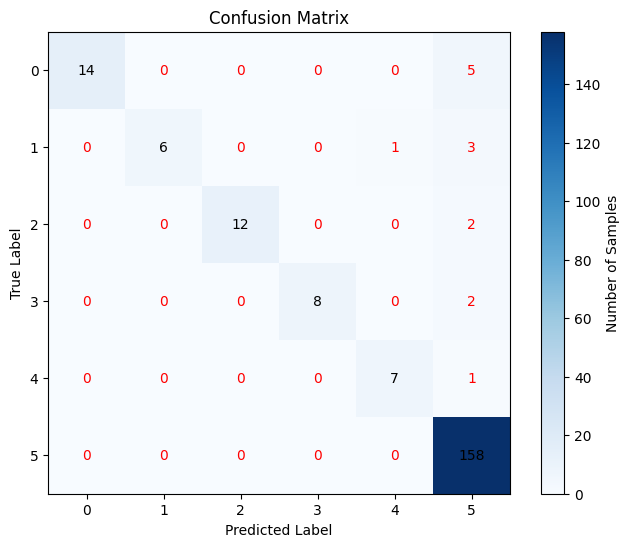

In [82]:
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = np.array([
    [14, 0, 0, 0, 0, 5],
    [0, 6, 0, 0, 1, 3],
    [0, 0, 12, 0, 0, 2],
    [0, 0, 0, 8, 0, 2],
    [0, 0, 0, 0, 7, 1],
    [0, 0, 0, 0, 0, 158]
])

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# 添加文本和顏色標記
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[i])):
        color = 'red' if i != j else 'black'  # 如果不是對角線上的元素，標記為紅色，否則為藍色
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color=color)

plt.title('Confusion Matrix')
plt.colorbar(label='Number of Samples')
tick_marks = np.arange(len(confusion_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




In [52]:
total_confidence = 0
total_predictions = len(predictions)

# Process predictions
for i, prediction in enumerate(predictions):
    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name and confidence score for each prediction
    print(f"Prediction {i+1}: Predicted Class: {predicted_class_name}, Confidence: {confidence_score}, Actual Label: {actual_score}")

# Calculate the average confidence score
average_confidence = total_confidence / total_predictions
print("Average Confidence Score:", average_confidence)


NameError: name 'actual_score' is not defined

In [ ]:
total_confidence = 0
total_predictions = len(predictions)
# Get the corresponding image name
image_names = '/content/drive/MyDrive/Dataset/TestingI/Safe'

# Process predictions
for i, prediction in enumerate(predictions):
    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name and confidence score for each image
    print(f"Image {i+1}: Name: {image_names}, Predicted Class: {predicted_class_name}, Confidence: {confidence_score}")

# Calculate the average confidence score
average_confidence = total_confidence / total_predictions
print("Average Confidence Score:", average_confidence)

Image 1: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.5418880581855774
Image 2: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9999908208847046
Image 3: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9520890116691589
Image 4: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9990147948265076
Image 5: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9906892776489258
Image 6: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9983283281326294
Image 7: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9999979734420776
Image 8: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.9619942307472229
Image 9: Name: /content/drive/MyDrive/Dataset/TestingI/Safe, Predicted Class: 5 , Confidence: 0.

In [ ]:
import os

# Directory containing the images
image_dir = '/content/drive/MyDrive/Dataset/TestingI/Safe'

# Get the list of image names
image_names = os.listdir(image_dir)[:100]  # Assuming you want to process the first 100 images

# Process predictions for each image
for i, image_name in enumerate(image_names):
    # Assuming predictions is a list containing predictions for each image
    prediction = predictions[i]

    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name and confidence score for each image
    print(f"Image {i+1}: Name: {image_name}, Predicted Class: {predicted_class_name}, Confidence: {confidence_score}")

# Calculate the average confidence score
average_confidence = total_confidence / len(image_names)
print("Average Confidence Score:", average_confidence)
## old


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/TestingI/Safe'

In [ ]:
# Process predictions for each image in the test set
total_confidence = 0
for i, prediction in enumerate(predictions):
    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name and confidence score for each image
    print(f"Image {i+1}, Predicted Class: {predicted_class_name}, Confidence: {confidence_score}")

# Calculate the average confidence score
average_confidence = total_confidence / len(predictions)
print("Average Confidence Score:", average_confidence)


Image 1, Predicted Class: 5, Confidence: 0.9206880927085876
Image 2, Predicted Class: 5, Confidence: 0.7077615261077881
Image 3, Predicted Class: 5, Confidence: 0.9923151135444641
Image 4, Predicted Class: 5, Confidence: 0.9794750809669495
Image 5, Predicted Class: 5, Confidence: 0.999999463558197
Image 6, Predicted Class: 5, Confidence: 0.982835054397583
Image 7, Predicted Class: 5, Confidence: 0.7053326368331909
Image 8, Predicted Class: 5, Confidence: 0.9762663841247559
Image 9, Predicted Class: 5, Confidence: 0.8262254595756531
Image 10, Predicted Class: 5, Confidence: 0.9999929666519165
Image 11, Predicted Class: 5, Confidence: 0.9988247752189636
Image 12, Predicted Class: 5, Confidence: 0.9740387201309204
Image 13, Predicted Class: 5, Confidence: 0.5739898085594177
Image 14, Predicted Class: 5, Confidence: 0.8222066164016724
Image 15, Predicted Class: 5, Confidence: 0.9053158760070801
Image 16, Predicted Class: 5, Confidence: 0.9990423917770386
Image 17, Predicted Class: 5, Confi

In [ ]:
import os

# Directory containing the images
image_dir = '/content/drive/MyDrive/Dataset/TestingI/Unsafe'

# Get the list of image names
image_names = os.listdir(image_dir)[:100]  # Assuming you want to process the first 100 images

# Process predictions for each image
for i, image_name in enumerate(image_names):
    # Assuming predictions is a list containing predictions for each image
    prediction = predictions[i]

    # Normalize the prediction to get probabilities using softmax function
    probabilities = np.exp(prediction) / np.sum(np.exp(prediction))

    # Determine the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score (probability) for the predicted class
    confidence_score = probabilities[predicted_class_index]

    # Accumulate the confidence scores
    total_confidence += confidence_score

    # Print the predicted class name and confidence score for each image
    print(f"Image {i+1}: Name: {image_name}, Predicted Class: {predicted_class_name}, Confidence: {confidence_score}")

# Calculate the average confidence score
average_confidence = total_confidence / len(image_names)
print("Average Confidence Score:", average_confidence)
##old


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/TestingI/Unsafe'

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

# num_images_to_display = min(80, len(images))  # Ensure not to exceed the number of available images

# for i in range(num_images_to_display):
#     ax = plt.subplot(10, 8, i + 1)  # Adjusting the subplot grid to fit 80 images
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[int(labels[i][0])])  # Convert label to int before accessing class_names
#     plt.axis("off")

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(test_labels, predicted_labels)
print("Mean Squared Error:", mse)


NameError: name 'predicted_labels' is not defined

In [ ]:
# Convert predictions to class labels
predicted_labels = []
for prediction in predictions:
    predicted_class_index = np.argmax(prediction)
    predicted_labels.append(predicted_class_index)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)
##old


ValueError: Found input variables with inconsistent numbers of samples: [0, 39]

In [ ]:
print(test_labels)

[2. 1. 0. 4. 2. 5. 5. 5. 5. 4. 5. 5. 4. 0. 5. 5. 5. 5. 5. 5. 5. 5. 3. 5.
 4. 5. 5. 5. 2. 5. 5. 5. 5. 0. 5. 5. 5. 5. 3. 5. 5. 5. 5. 5. 3. 0. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 3. 2. 5. 4. 5. 5. 2. 5. 2. 0. 5. 5. 5. 3. 0. 5. 5. 4. 5. 2. 5. 5. 5.
 0. 5. 5. 5. 5. 0. 5. 2. 5. 5. 1. 5. 0. 5. 5. 5. 1. 4. 5. 5. 5. 0. 5. 5.
 2. 3. 5. 5. 3. 5. 5. 5. 5. 5. 1. 3. 5. 5. 5. 0. 5. 5. 5. 2. 5. 3. 5. 1.
 0. 5. 5. 5. 0. 5. 5. 2. 5. 5. 5. 5. 0. 5. 5. 5. 5. 1. 5. 0. 5. 5. 5. 5.
 5. 5. 5. 5. 0. 5. 5. 5. 5. 1. 5. 5. 5. 5. 0. 5. 5. 5. 5. 2. 0. 5. 5. 2.
 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 1. 5. 5. 2. 5. 3. 1. 5. 5. 5.
 5. 5. 1.]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE:", rmse)



NameError: name 'predicted_labels' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(test_labels, predicted_labels)
print("MAE:", mae)

# Calculate R-squared value (R2)
r2 = r2_score(test_labels, predicted_labels)
print("R-squared:", r2)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(test_labels, predicted_labels)
print("MAPE:", mape)


MAE: 0.6335897435897436
R-squared: -0.17750444886423122
MAPE: 461907654089281.6


In [ ]:
from sklearn.metrics import accuracy_score

# Convert predictions to class labels
predicted_labels = []
for prediction in predictions:
    predicted_class_index = np.argmax(prediction)
    predicted_labels.append(predicted_class_index)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)
##old


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
# Load the ground truth labels
test_labels = []
for images, labels in test_path:
    test_labels.extend(labels.numpy())

# Convert predictions to class labels
predicted_labels = []
for prediction in predictions:
    predicted_class_index = np.argmax(prediction)
    predicted_labels.append(predicted_class_index)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)
##old

NameError: name 'test_path' is not defined

### Confusion Matrix


In [ ]:
#Evaluation with Confusion Matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Calculate performance metrics
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, predicted_labels))

Classification Report:


ValueError: Classification metrics can't handle a mix of continuous and binary targets

Text(0.5, 1.0, 'Image Classification of Unsafe Childrens Toys')

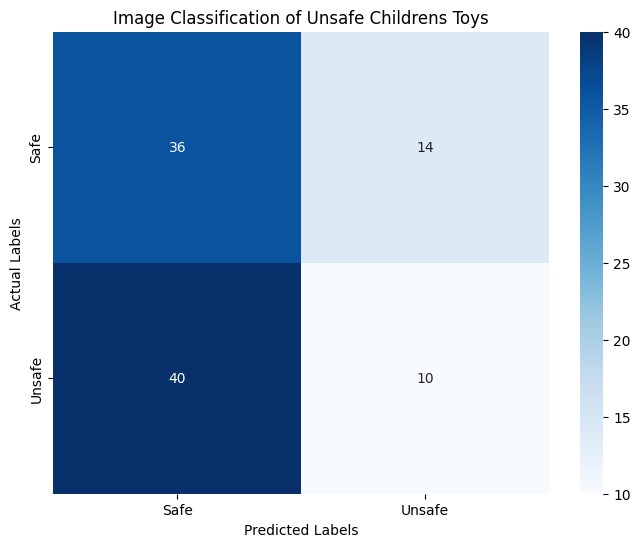

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Safe','Unsafe'], yticklabels=['Safe','Unsafe'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Image Classification of Unsafe Childrens Toys')


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
train_path = tf.keras.utils.image_dataset_from_directory (
  '/content/drive/MyDrive/Dataset/TrainingI',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

train_path = tf.keras.utils.image_dataset_from_directory (
  '/content/drive/MyDrive/Dataset/TrainingI')
# Define parameters for loading the dataset
batch_size = 32

Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
train_path = tf.keras.utils.image_dataset_from_directory (
  '/content/drive/MyDrive/Dataset/TrainingI',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

# Load the training dataset
train_ds = train_path  # Assuming train_path is your dataset object

# Extract images and labels from the training dataset
train_images = []
train_labels = []
for images, labels in train_ds:
    train_images.append(images)
    train_labels.append(labels)

# Concatenate batches
train_images = tf.concat(train_images, axis=0)
train_labels = tf.concat(train_labels, axis=0)

# Print the shape of the loaded data
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)

Found 400 files belonging to 2 classes.
Using 320 files for training.
Shape of train_images: (320, 180, 180, 3)
Shape of train_labels: (320,)


In [ ]:
# Assuming you have your data loaded as train_images, train_labels

# Define the number of folds for cross-validation
num_folds = 5

# Initialize KFold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# Define your image classification model using TensorFlow/Keras
model = tf.keras.Sequential([
    # Define your model architecture
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so output layer has 1 neuron with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Initialize lists to store cross-validation accuracy
cv_accuracies = []

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(kfold.split(train_images)):
    print(f"Fold {fold + 1}/{num_folds}")

    import numpy as np

# Assuming train_indices and val_indices are already defined
# Convert train_indices and val_indices to NumPy arrays
train_indices_array = np.array(train_indices)
val_indices_array = np.array(val_indices)

# Verify index values and array dimensions
# Make sure that train_indices and val_indices contain valid index values

# Convert train_indices_array and val_indices_array to lists
train_indices_list = train_indices_array.tolist()
val_indices_list = val_indices_array.tolist()

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


In [ ]:
# Split data into training and validation sets for this fold
try:
    X_train, X_val = train_images[train_indices_list], train_images[val_indices_list]
    y_train, y_val = train_labels[train_indices_list], train_labels[val_indices_list]

    print("Shapes of train_images, X_train, X_val:", train_images.shape, X_train.shape, X_val.shape)
    print("Shapes of train_labels, y_train, y_val:", train_labels.shape, y_train.shape, y_val.shape)

    # Train the model on this fold
    # ...
except IndexError as e:
    print("IndexError occurred:", e)
    print("train_indices_list:", train_indices_list)
    print("val_indices_list:", val_indices_list)
except OverflowError as e:
    print("OverflowError occurred:", e)


OverflowError occurred: int too big to convert


In [ ]:
print("Max index in train_indices:", max(train_indices))
print("Max index in val_indices:", max(val_indices))
print("Train Indices List:", train_indices_list)
print("Validation Indices List:", val_indices_list)

Max index in train_indices: 319
Max index in val_indices: 318
Train Indices List: [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 99, 100, 101, 103, 104, 105, 106, 108, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 133, 134, 135, 137, 138, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 208, 210, 211, 212, 213, 214, 215, 219, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 250, 251, 

In [ ]:
# Check for negative indices
if any(idx < 0 for idx in train_indices_list) or any(idx < 0 for idx in val_indices_list):
    print("Error: Negative indices are not allowed.")

# Check if indices exceed the length of the corresponding dimension
if max(train_indices_list) >= train_images.shape[0] or max(val_indices_list) >= train_images.shape[0]:
    print("Error: Indices exceed the length of the train_images array.")

# Check for duplicates in index lists
if len(train_indices_list) != len(set(train_indices_list)) or len(val_indices_list) != len(set(val_indices_list)):
    print("Error: Duplicate indices found in index lists.")


### Cross Validation Accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(kfold.split(train_images)):
    print("Fold {}/{}".format(fold + 1, num_folds))

    # Convert indices to TensorFlow tensors
    train_indices_tensor = tf.constant(train_indices)
    val_indices_tensor = tf.constant(val_indices)

    # Split data into training and validation sets for this fold
    X_train, X_val = tf.gather(train_images, train_indices_tensor), tf.gather(train_images, val_indices_tensor)
    y_train, y_val = tf.gather(train_labels, train_indices_tensor), tf.gather(train_labels, val_indices_tensor)

    # Train the model on this fold
    model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Fold 1/5
Epoch 1/15
8/8 [==============================] - 2s 67ms/step - loss: 347.1626 - accuracy: 0.5000 - val_loss: 0.9212 - val_accuracy: 0.5469
Epoch 2/15
8/8 [==============================] - 0s 48ms/step - loss: 0.7142 - accuracy: 0.5586 - val_loss: 0.6802 - val_accuracy: 0.4375
Epoch 3/15
8/8 [==============================] - 0s 55ms/step - loss: 0.5446 - accuracy: 0.7305 - val_loss: 0.6550 - val_accuracy: 0.6250
Epoch 4/15
8/8 [==============================] - 1s 71ms/step - loss: 0.2892 - accuracy: 0.9062 - val_loss: 1.0076 - val_accuracy: 0.5938
Epoch 5/15
8/8 [==============================] - 0s 56ms/step - loss: 0.6030 - accuracy: 0.8320 - val_loss: 0.6997 - val_accuracy: 0.5312
Epoch 6/15
8/8 [==============================] - 0s 47ms/step - loss: 0.2797 - accuracy: 0.8828 - val_loss: 0.7808 - val_accuracy: 0.5938
Epoch 7/15
8/8 [==============================] - 0s 42ms/step - loss: 0.1514 - accuracy: 0.9531 - val_loss: 0.9478 - val_accuracy: 0.7188
Epoch 8/15
8/8 [

In [ ]:
# Evaluate the model on the validation set for this fold
_, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy for Fold {}: {}".format(fold + 1, accuracy))

# Append the accuracy to the list of cross-validation accuracies
cv_accuracies.append(accuracy)

# Print the list of cross-validation accuracies
print("Cross-Validation Accuracies:", cv_accuracies)

Validation Accuracy for Fold 5: 0.984375
Cross-Validation Accuracies: [0.984375]


In [ ]:
# # Error analysis
# misclassified_images_indices = [i for i, (true_label, pred_label) in enumerate(zip(test_labels, predicted_labels)) if true_label != pred_label]
# print("Misclassified Images:")
# for i in misclassified_images_indices:
#     plt.imshow(images[i].astype("uint8"))
#     plt.title(f"Predicted Class: {class_names[predicted_labels[i]]}, True Class: {class_names[test_labels[i]]}")
#     plt.show()

# # Fine-tuning, deployment, and documentation steps are application-specific and may require additional implementation.



In [ ]:
# # Make predictions for the batch of images
# batch_images = np.array(batch_images)
# predictions = model.predict(batch_images)

#     # Since it's a binary classification, you may just need the class label (0 or 1)
#     # If your model outputs probabilities, you can use argmax to get the predicted class
predicted_classes = predictions.argmax(axis=-1)


In [ ]:
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )


In [ ]:
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )


In [ ]:
# new_model = tf.keras.models.load_model('my_model.keras')

# # Show the model architecture(use later for testing)
# new_model.summary()

Use your model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and dropout layers are inactive at inference time.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# img_height = 200
# img_width = 200
# testing_path = tf.keras.utils.image_dataset_from_directory(
#   '/content/drive/MyDrive/Dataset/TestingII')

# # Load and process the images
# for images, labels in testing_path:
#     for img in images:
#         # Process the image as needed
#         img = tf.image.resize(img, (img_height, img_width))
#         # ...

# # Alternatively, you can use the map function to apply a function to each element of the dataset
# def preprocess_images(img):
#     return tf.image.resize(img, (img_height, img_width))

# testing_path = testing_path.map(lambda x, y: (preprocess_images(x), y))

# # Now, testing_path contains preprocessed images and original labels


In [ ]:
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

## Use TensorFlow Lite

TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and edge devices.

### Convert the Keras Sequential model to a TensorFlow Lite model

To use the trained model with on-device applications, first [convert it](https://www.tensorflow.org/lite/models/convert) to a smaller and more efficient model format called a [TensorFlow Lite](https://www.tensorflow.org/lite/) model.

In this example, take the trained Keras Sequential model and use `tf.lite.TFLiteConverter.from_keras_model` to generate a [TensorFlow Lite](https://www.tensorflow.org/lite/) model:

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Create a simple Sequential model for binary classification
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(200, 200, 3)),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

The TensorFlow Lite model you saved in the previous step can contain several function signatures. The Keras model converter API uses the default signature automatically. Learn more about [TensorFlow Lite signatures](https://www.tensorflow.org/lite/guide/signatures).

### Run the TensorFlow Lite model

You can access the TensorFlow Lite saved model signatures in Python via the `tf.lite.Interpreter` class.

Load the model with the `Interpreter`:

In [ ]:
# TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

# interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

Print the signatures from the converted model to obtain the names of the inputs (and outputs):


In [ ]:
# interpreter.get_signature_list()

In this example, you have one default signature called `serving_default`. In addition, the name of the `'inputs'` is `'sequential_1_input'`, while the `'outputs'` are called `'outputs'`. You can look up these first and last Keras layer names when running `Model.summary`, as demonstrated earlier in this tutorial.

Now you can test the loaded TensorFlow Model by performing inference on a sample image with `tf.lite.Interpreter.get_signature_runner` by passing the signature name as follows:

In [ ]:
# import tensorflow as tf

# # Assuming TF_MODEL_FILE_PATH is the path to your TFLite model file
# TF_MODEL_FILE_PATH = 'model.tflite'

# # Create the interpreter and allocate tensors
# interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
# interpreter.allocate_tensors()

# # Print input details
# input_details = interpreter.get_input_details()
# print("Input details:", input_details)

# # Print input names
# input_names = [detail['name'] for detail in input_details]
# print("Input names:", input_names)


In [ ]:
# classify_lite = interpreter.get_signature_runner('serving_default')
# classify_lite

Similar to what you did earlier in the tutorial, you can use the TensorFlow Lite model to classify images that weren't included in the training or validation sets.

You have already tensorized that image and saved it as `img_array`. Now, pass it to the first argument (the name of the `'inputs'`) of the loaded TensorFlow Lite model (`predictions_lite`), compute softmax activations, and then print the prediction for the class with the highest computed probability.

In [ ]:
# result = classify_lite(dense_3_input=img_array)
# print(result.keys())


In [ ]:
# # Assuming the correct key is 'dense_4'
# predictions_lite = classify_lite(dense_3_input=img_array)['dense_4']

# # Apply softmax if needed
# score_lite = tf.nn.softmax(predictions_lite)


The prediction generated by the lite model should be almost identical to the predictions generated by the original model:

In [ ]:
# print(np.max(np.abs(predictions - predictions_lite)))

Of the five classes—`'daisy'`, `'dandelion'`, `'roses'`, `'sunflowers'`, and `'tulips'`—the model should predict the image belongs to sunflowers, which is the same result as before the TensorFlow Lite conversion.


## Next steps

This tutorial showed how to train a model for image classification, test it, convert it to the TensorFlow Lite format for on-device applications (such as an image classification app), and perform inference with the TensorFlow Lite model with the Python API.

You can learn more about TensorFlow Lite through [tutorials](https://www.tensorflow.org/lite/tutorials) and [guides](https://www.tensorflow.org/lite/guide).

Evaluation with Confusion Matrix

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# from IPython.display import display
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# from PIL import Image
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import numpy as np
# import pandas as pd


In [ ]:
# # Assuming you have a directory structure with subdirectories for each class
# train_data = tf.keras.preprocessing.image_dataset_from_directory(
#     '/content/drive/MyDrive/Dataset/TrainingI',
#     image_size=(200, 200),
#     batch_size=32,
#     validation_split=0.2,
#     subset="training",
#     seed=42
# )

# test_data = tf.keras.preprocessing.image_dataset_from_directory(
#     '/content/drive/MyDrive/Dataset/TrainingI',
#     image_size=(200, 200),
#     batch_size=32,
#     validation_split=0.2,
#     subset="validation",
#     seed=42
# )

# # Initialize lists to store feature data and labels
# X_train, y_train = [], []
# X_test, y_test = [], []

# # Iterate over training data batches
# for images, labels in train_data:
#     X_train.append(images.numpy())
#     y_train.append(labels.numpy())

# # Concatenate the batches to get the complete training data
# X_train = np.concatenate(X_train)
# y_train = np.concatenate(y_train)

# # Iterate over testing data batches
# for images, labels in test_data:
#     X_test.append(images.numpy())
#     y_test.append(labels.numpy())

# # Concatenate the batches to get the complete testing data
# X_test = np.concatenate(X_test)
# y_test = np.concatenate(y_test)

# # Now you have X_train, y_train, X_test, y_test for model training and evaluation


In [ ]:
# # Convert y_pred to integer type
# y_pred = np.argmax(y_pred)

# # Check the data type after conversion
# print("Data type of y_pred after conversion:", y_pred.dtype)


NameError: name 'y_pred' is not defined

In [ ]:
# # Split the data into training and testing sets (50-50 split)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# # # Train the logistic regression model
# # model = LogisticRegression()
# # model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# # Calculate the confusion matrix
# cm = conf_matrix(y_test, y_pred)

# # Calculate the validation metrics
# accuracy = accuracy_score(y_test, y_pred)

# # Plot confusion matrix heatmap for the original model
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
# plt.title('Confusion Matrix')

# plt.tight_layout()
# plt.show()

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, accuracy_score

# # Hypothetical ground truth labels (0 or 1)
# y_true = np.random.randint(2, size=500)

# # Hypothetical predicted labels for the model
# y_pred= np.random.radint(2, size=500)

# # Compute confusion matrices
# conf_matrix= confusion_matrix(y_true, y_pred)

# # Plot confusion matrix heatmap for the  model
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
# plt.title('Confusion Matrix')

# plt.tight_layout()
# plt.show()
